# BMW Pricing Challenge %77 True Prediction

Hi everybody ! Estimating the value of a used car is quite difficult. By basing on BMW used car dataset, I created a model. It was enjoyable a study for me. I hope you enjoy it. I'm wating that you write your all ideas. If it benefits for you, please, don't forget to upvote ! 

## Have A Fun

# CONTENT

[1.Exploratory Data Analysis <br/>](#1)
[2.Cleaning Data <br/>](#2)
[3.Prediction<br/>](#3)
[4.Evaluation Regression Models <br/>](#4)


<a id="1"></a>
## Exploratory Data Analysis

In [483]:
%config IPCompleter.greedy=True
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#predict library
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 

import os
print(os.listdir("./"))
def save_img(name):
    plt.savefig(name + ".svg", bbox_inches='tight')

['Przebieg.svg', 'correlation.svg', 'priceModel.svg', 'sold_at.svg', 'Typ paliwa.svg', 'Procentowy udział danego typu pojazdu w zbiorze.svg', 'Przebieg w milach.svg', 'features.svg', 'bmw_pricing_challenge.csv', '.ipynb_checkpoints', 'starter-bmw-pricing-challenge-d8c6c2c2-9.ipynb', 'Procentowy udział pojazdów o danym wieku.svg', '.idea', 'modelPercent.svg', 'vehicle_age.svg', 'Kolor pojazu.svg', 'car_type.svg', 'powerModel.svg', 'kernelb575fced68.ipynb', 'bmw-regressors-price-prediction.ipynb', 'fuel.svg', 'bmw-pricing-challenge-77-true-prediction.ipynb']


In [548]:
#read data
data = pd.read_csv('./bmw_pricing_challenge.csv')

In [549]:
data['sold_at'] = pd.to_datetime(data['sold_at'])
data['registration_date'] = pd.to_datetime(data['registration_date'])
data['age'] = (data['sold_at'] - data['registration_date']).apply(lambda x: x.days // 365)
print(df.dtypes)

model_key                  category
mileage                       int64
engine_power                  int64
registration_date    datetime64[ns]
fuel                          int64
paint_color                   int64
car_type                      int64
feature_1                      bool
feature_2                      bool
feature_3                      bool
feature_4                      bool
feature_5                      bool
feature_6                      bool
feature_7                      bool
feature_8                      bool
price                         int64
sold_at              datetime64[ns]
age                           int64
dtype: object


In [550]:
df = data
df.drop(["maker_key"], axis=1, inplace=True)
#Convert string/text to categorical values
car_models = df.model_key.copy()
model_labels = df['model_key'].astype('category').cat.categories.tolist()
model_labels_dict = {k: v for k,v in zip(model_labels,list(range(1,len(model_labels)+1)))}
fuel_labels = df['fuel'].astype('category').cat.categories.tolist()
fuel_labels_dict = {k: v for k,v in zip(fuel_labels,list(range(1,len(fuel_labels)+1)))}
paint_labels = df['paint_color'].astype('category').cat.categories.tolist()
paint_labels_dict =  {k: v for k,v in zip(paint_labels,list(range(1,len(paint_labels)+1)))}
type_labels = df['car_type'].astype('category').cat.categories.tolist()
type_labels_dict =  {k: v for k,v in zip(type_labels,list(range(1,len(type_labels)+1)))}


df.replace(model_labels_dict, inplace=True)
df.replace(fuel_labels_dict, inplace=True)
df.replace(paint_labels_dict, inplace=True)
df.replace(type_labels_dict, inplace=True)

df['model_key'] = df['model_key'].astype('category')

#Convert registration_date to integer
# df['registration_date'] = df['registration_date'].str.replace("-","").astype(int)
print(df.dtypes)


model_key                  category
mileage                       int64
engine_power                  int64
registration_date    datetime64[ns]
fuel                          int64
paint_color                   int64
car_type                      int64
feature_1                      bool
feature_2                      bool
feature_3                      bool
feature_4                      bool
feature_5                      bool
feature_6                      bool
feature_7                      bool
feature_8                      bool
price                         int64
sold_at              datetime64[ns]
age                           int64
dtype: object


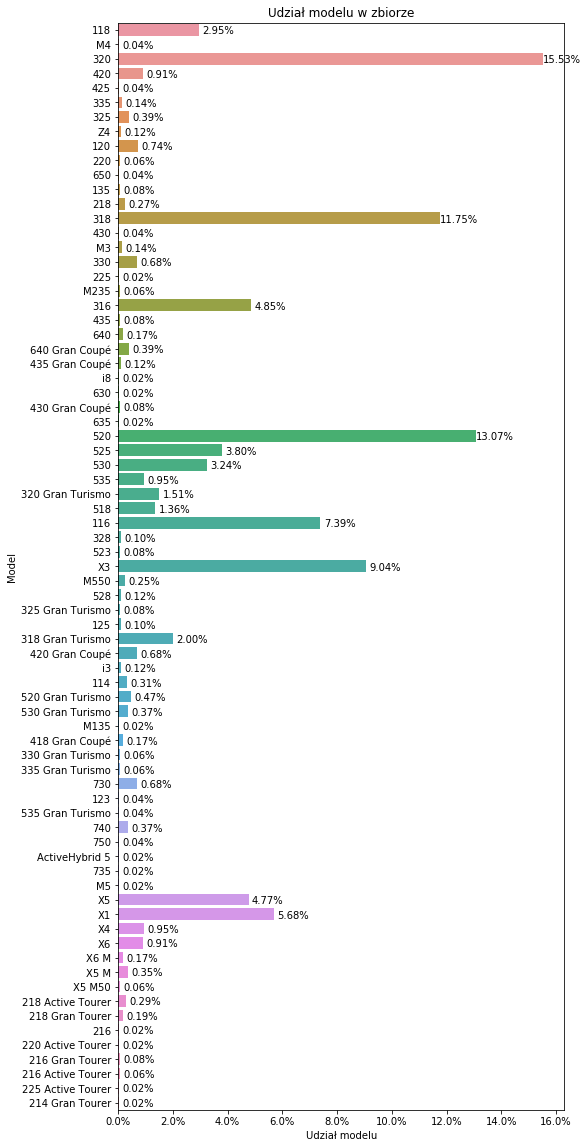

In [500]:
model_key = data['model_key'].unique()
count = []
for each in model_key:
    x = data[data['model_key']==each]
    count.append(len(x) / len(data))
plt.figure(figsize=(8,20))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
splot = sns.barplot(x=count,y=model_key)
plt.xlabel("Udział modelu")
plt.ylabel("Model")
plt.title("Udział modelu w zbiorze")
for p in splot.patches:
    splot.annotate(format(p.get_width() * 100, '.2f') + "%", (p.get_width() + 0.007, p.get_y() + p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

save_img("modelPercent")
plt.show()

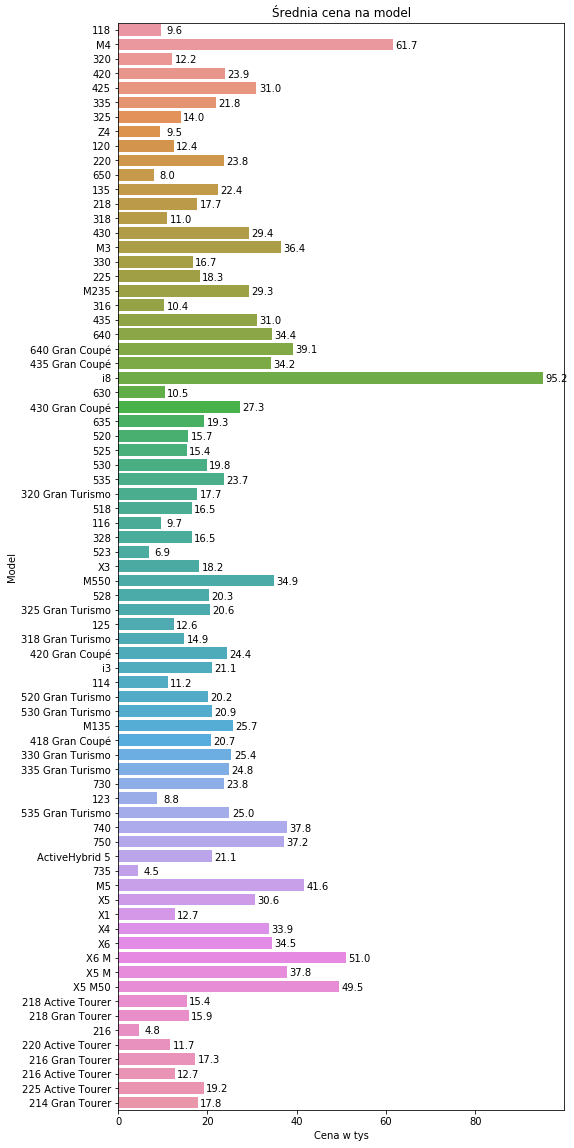

In [499]:
model_key = data['model_key'].unique()
engine_power = []
for each in model_key:
    x = data[data['model_key']==each]
    engine_power.append(sum(x['price']/len(x)/1000))

plt.figure(figsize=(8,20))
splot = sns.barplot(x=engine_power,y=model_key)
plt.xlabel("Cena w tys")
plt.ylabel("Model")
plt.title("Średnia cena na model")
for p in splot.patches:
    splot.annotate(format(p.get_width(), '.1f'), (p.get_width() + 3, p.get_y() + p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

save_img("priceModel")
plt.show()

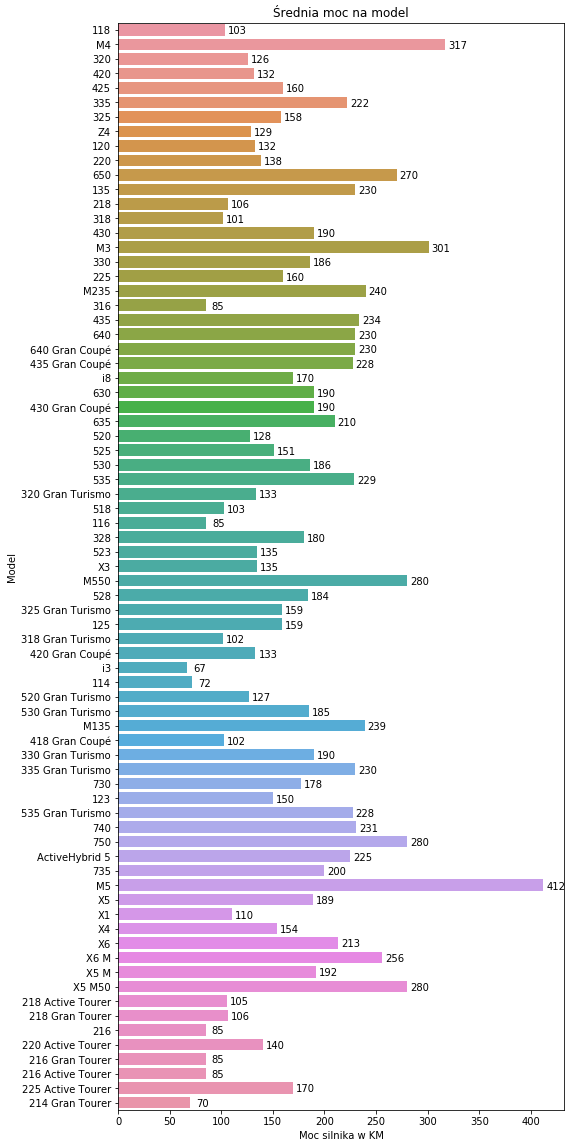

In [498]:
model_key = data['model_key'].unique()
engine_power = []
for each in model_key:
    x = data[data['model_key']==each]
    engine_power.append(sum(x['engine_power']/len(x)))

plt.figure(figsize=(8,20))
splot = sns.barplot(x=engine_power,y=model_key)
plt.xlabel("Moc silnika w KM")
plt.ylabel("Model")
plt.title("Średnia moc na model")
for p in splot.patches:
    splot.annotate(format(p.get_width(), '.0f'), (p.get_width() + 12, p.get_y() + p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
save_img("powerModel")
plt.show()

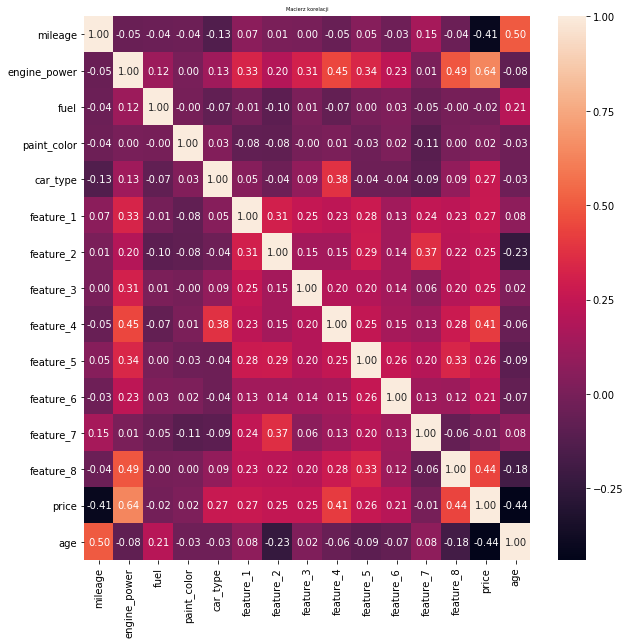

In [551]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title("Macierz korelacji",fontsize=5)
save_img('correlation')
plt.show()

In [496]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow, columns):
    nunique = df.nunique()
    df = df[columns] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (4 * nGraphPerRow, 3 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        ax = plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        column = columnNames[i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            labels, counts = count_data(column)
            create_pie(ax, counts, column, labels)
        else:
            columnDf.hist()
            plt.ylabel('counts')
            plt.xticks(rotation = 90)
            plt.title(column)
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    
    save_img("features")
    plt.show()


# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

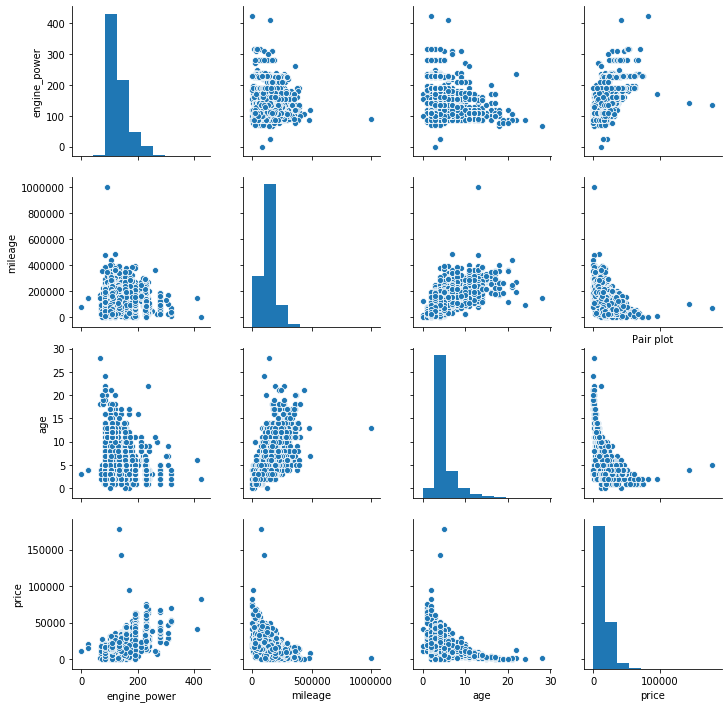

In [562]:
to_pair = df[['engine_power', 'mileage', 'age', 'price']]
sns.pairplot(data= to_pair)
plt.title("Pair plot",fontsize =10)
save_img("pairs")
plt.show()

In [521]:
from collections import defaultdict

def count_data(field):
    result = defaultdict(lambda: 0)
    total = 0
    for v in data[field]:
        result[v] += 1
        total += 1
    return zip(*result.items())


def get_annotations_positions(wedges):
    temp = []
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        text_y = 1.2*y
        text_x = 1.2*x
        temp.append((ang, x, y, text_x, text_y))
        
    if len(temp) <= 2:
        return temp
    changed = True
    while changed:
        changed = False
        ang1, x1,y1,tx1, ty1 = temp[0]
        res = []
        for ang2, x2, y2, tx2, ty2 in temp[1:]:
            if abs(ty1 - ty2) < 0.1 and abs(tx1 - tx2) < 0.1:
                changed = True
                if ty1 < ty2:
                    ty1 -= 0.05
                    ty2 += 0.05
                else:
                    ty1 += 0.05
                    ty2 -= 0.05
            res.append((ang1, x1,y1, tx1, ty1))
            ang1, x1,y1,tx1, ty1 = ang2, x2, y2, tx2, ty2
        res.append((ang1, x1,y1, tx1, ty1))
        temp = res
    return temp

def create_pie(ax, counts, title,labels, colors=None):
    total = sum(counts)
    wedges, texts = ax.pie(counts, startangle=-20, colors=colors)

    bbox_props = dict(boxstyle="square,pad=0.4", fc="w", lw=0.4)
    kw = dict(arrowprops=dict(arrowstyle="-|>"),
              bbox=bbox_props, zorder=0, va="center")
    
    positions = get_annotations_positions(wedges)
    for i, (ang, x, y, text_x, text_y) in enumerate(positions):
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        ax.annotate(str(labels[i]) + " " + format(counts[i]/total * 100, '.2f') + "%",
                    xy=(x, y), xytext=(text_x, text_y),
                    horizontalalignment=horizontalalignment, **kw)
        last_y = text_y
    plt.setp(autotexts, size=20, weight="bold")

    plt.title(title)
    
    
def show_pie(counts, labels, title, colors=None):
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"), dpi=80)
    create_pie(ax, counts, title, labels, colors)
    save_img(title)
    plt.show()
    
def category_histo(column, title, xlabel, ylabel, data=data):
    plt.figure(figsize=(15,10))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    ax = sns.barplot(x=column, y=column, data=data, estimator=lambda x: len(x) / len(data), orient="v")
    ax.set(ylabel=ylabel, xlabel=xlabel,title=title)
    for p in ax.patches:
        ax.annotate(format(p.get_height() * 100, '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    save_img(column)
    plt.show()

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']


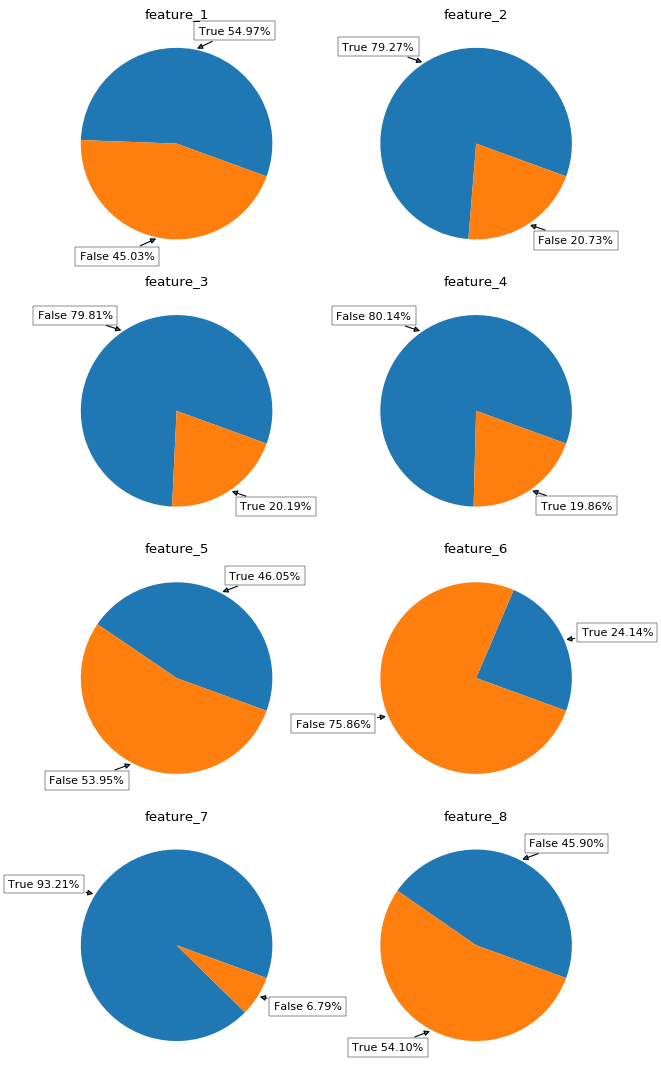

In [511]:
columns = ['feature_' + str(i) for i in range(1, 9)]
print(columns)
plotPerColumnDistribution(data, 8, 2, columns)

In [489]:

from matplotlib.ticker import PercentFormatter
def show_histo(df, title, x_label, y_label, bins=None):
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    df.plot.hist(figsize=(12,12), title=title, bins=bins,rwidth=0.9,  weights=np.ones(len(df)) / len(df))
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    save_img(title)


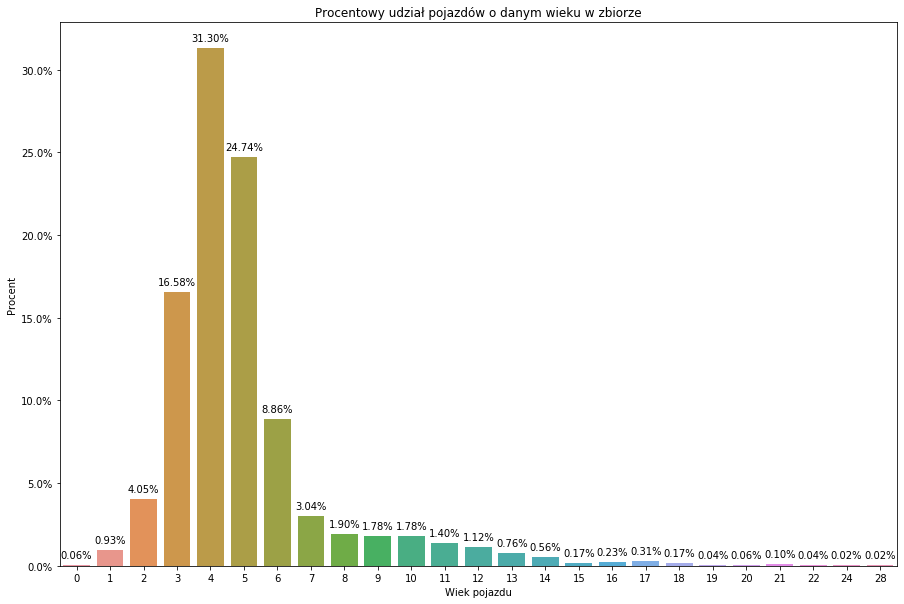

In [525]:
category_histo('age', 'Procentowy udział pojazdów o danym wieku w zbiorze', "Wiek pojazdu", "Procent")

### Engine Power according to Model Visualization

### Mileage Visualization

<Figure size 720x720 with 0 Axes>

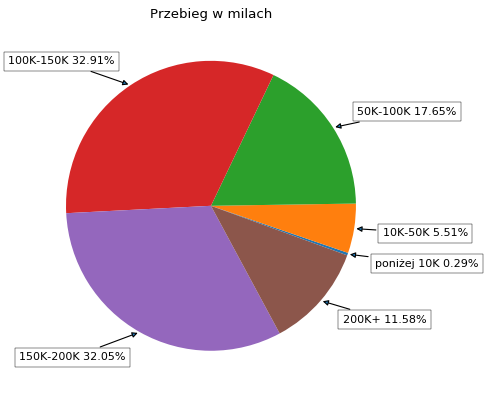

In [513]:
mileage = []
labels = ['poniżej 10K','10K-50K','50K-100K','100K-150K','150K-200K','200K+']
for each in range(1,21):
    each = each*10000
    if(each==10000):
        x = data[data['mileage']<10000]
        mileage.append(len(x))
    elif(each==50000):
        x = data[(data['mileage']>=10000) & (data['mileage']<50000)]
        mileage.append(len(x))
    elif(each==100000):
        x = data[(data['mileage']>=50000) & (data['mileage']<100000)]
        mileage.append(len(x))
    elif(each==150000):
        x = data[(data['mileage']>=100000) & (data['mileage']<150000)]
        mileage.append(len(x))
    elif(each==200000):
        x = data[(data['mileage']>=150000) & (data['mileage']<200000)]
        mileage.append(len(x))
        x = data[data['mileage']>=200000]
        mileage.append(len(x))
plt.figure(figsize=(10,10))

show_pie(mileage, labels, "Przebieg w milach")
plt.show()

### Registration Date Visualization

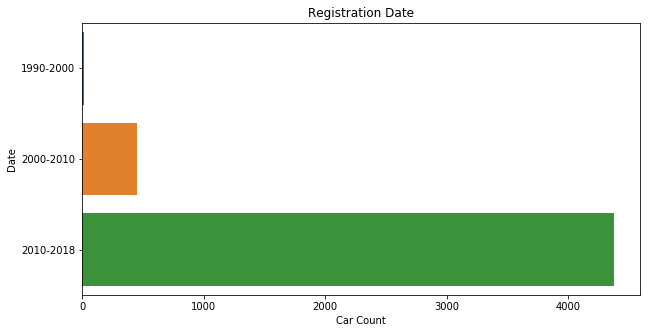

In [6]:
date = []
year = ['1990-2000',"2000-2010","2010-2014", "2014-2018"]
data['']
for i in range(1,4):
    if (i==1):
        x = data[data['registration_date']>="1990-03-01") & (data['registration_date']<"2000-01-01")]
        date.append(len(x))
    elif(i==2):
        x = data[(data['registration_date']>="2000-01-01") & (data['registration_date']<"2010-01-01")]
        date.append(len(x))
    elif(i==3):
        x = data[(data['registration_date']>="2010-01-01") & (data['registration_date']<"2018-01-01")]
        date.append(len(x))
plt.figure(figsize=(10,5))
sns.barplot(x=date,y=year)
plt.xlabel("Car Count")
plt.ylabel("Date")
plt.title("Registration Date")
plt.show()

### Fuel Type Visualization

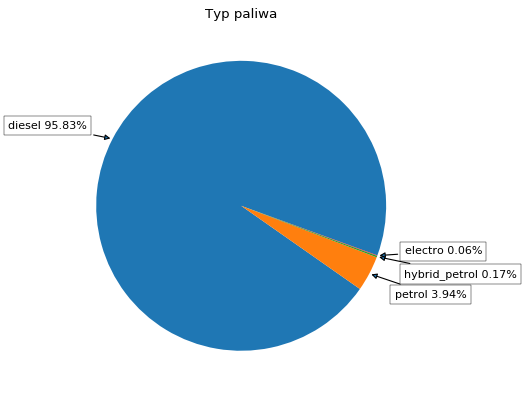

In [514]:
fuel, count = count_data('fuel')
show_pie(count, fuel, "Typ paliwa", None)

### Color Type Visualization

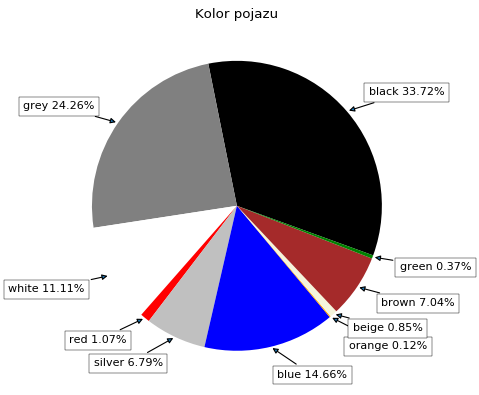

In [515]:
from collections import defaultdict

color, counts = count_data("paint_color")

show_pie(counts, color, "Kolor pojazu", color)


### Car Type Visualization

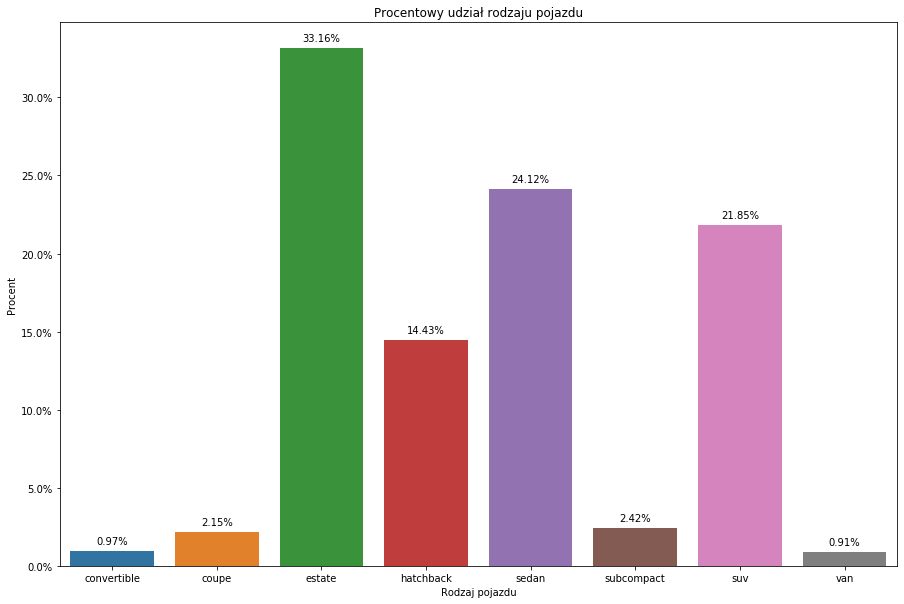

In [522]:
category_histo('car_type', 'Procentowy udział rodzaju pojazdu', "Rodzaj pojazdu", "Procent")

### Sold Date Visualization

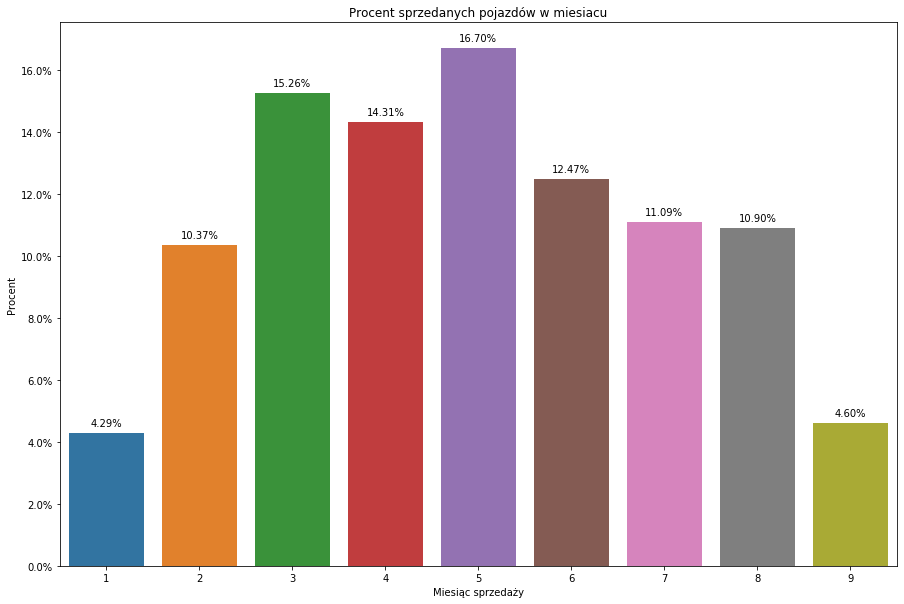

In [554]:
sold_at = pd.DataFrame(data['sold_at'].apply(lambda x: x.month))
category_histo('sold_at', "Procent sprzedanych pojazdów w miesiacu", "Miesiąc sprzedaży", "Procent", data=sold_at)

sold_at
2018-01-01    14.908654
2018-02-01    16.045618
2018-03-01    15.558322
2018-04-01    16.038240
2018-05-01    16.057478
2018-06-01    15.331291
2018-07-01    15.411359
2018-08-01    16.827273
2018-09-01    15.587892
Name: price, dtype: float64
[1 2 3 4 5 6 7 8 9]


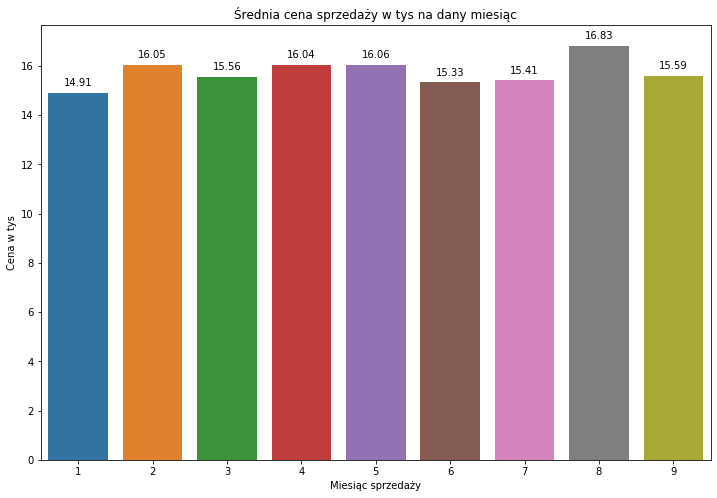

In [603]:
sold_at_data = data.groupby('sold_at').mean()['price'] / 1000
sold_at = data['sold_at'].apply(lambda x: x.month).unique()
sold_at.sort()
print(sold_at_data)
plt.figure(figsize=(12,8))
print(sold_at)
splot = sns.barplot(x=sold_at,y=sold_at_data)
plt.ylabel("Cena w tys")
plt.xlabel("Miesiąc sprzedaży")
plt.title("Średnia cena sprzedaży w tys na dany miesiąc")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

save_img("priceMonth")
plt.show()

<a id="2"></a>
# Cleaning Data

In [11]:
data.drop(['maker_key','model_key'],axis=1,inplace=True)
data.head()

,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,sold_at
0,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,2018-01-01
1,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,2018-02-01
2,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,2018-02-01
3,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,2018-02-01
4,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,2018-04-01


### Registration Date

Registration date is important in terms of learning the age of car. We should bring this information to status that it can use. I divided them into 3. I gave a number to every interval. So that I can use it in my model.

In [12]:
data['RegistrationDate'] = [1 if(i>="1990-03-01" and i<"2000-01-01") else 2 if(i>="2000-01-01" and i<"2010-01-01")
                            else 3 for i in data['registration_date']]

### Fuel Type

New or used car, don't matter. While we buy a car, we pay attention to fuel type. We should bring this information ,like registration date, to status that it can use. So that I can use it in my model.

In [13]:
data['fuel'] = data['fuel'].replace("diesel",1)
data['fuel'] = data['fuel'].replace("petrol",2)
data['fuel'] = data['fuel'].replace("hybrid_petrol",3)
data['fuel'] = data['fuel'].replace("electro",4)

### Color Type

How is your relationship with color? I think you love colors. So that, I should add my model it.

In [14]:
data['paint_color'] = data['paint_color'].replace("black",1)
data['paint_color'] = data['paint_color'].replace("grey",2)
data['paint_color'] = data['paint_color'].replace("white",3)
data['paint_color'] = data['paint_color'].replace("red",4)
data['paint_color'] = data['paint_color'].replace("silver",5)
data['paint_color'] = data['paint_color'].replace("blue",6)
data['paint_color'] = data['paint_color'].replace("orange",7)
data['paint_color'] = data['paint_color'].replace("beige",8)
data['paint_color'] = data['paint_color'].replace("brown",9)
data['paint_color'] = data['paint_color'].replace("green",10)

### Car Type

In [15]:
data['car_type'].unique()
data['car_type'] = data['car_type'].replace("convertible",1)
data['car_type'] = data['car_type'].replace("coupe",2)
data['car_type'] = data['car_type'].replace("estate",3)
data['car_type'] = data['car_type'].replace("hatchback",4)
data['car_type'] = data['car_type'].replace("sedan",5)
data['car_type'] = data['car_type'].replace("subcompact",6)
data['car_type'] = data['car_type'].replace("suv",7)
data['car_type'] = data['car_type'].replace("van",8)

### Feature Types

In [16]:
data['feature_1'] = data['feature_1'].replace(True,1)
data['feature_1'] = data['feature_1'].replace(False,0)
data['feature_2'] = data['feature_2'].replace(True,1)
data['feature_2'] = data['feature_2'].replace(False,0)
data['feature_3'] = data['feature_3'].replace(True,1)
data['feature_3'] = data['feature_3'].replace(False,0)
data['feature_4'] = data['feature_4'].replace(True,1)
data['feature_4'] = data['feature_4'].replace(False,0)
data['feature_5'] = data['feature_5'].replace(True,1)
data['feature_5'] = data['feature_5'].replace(False,0)
data['feature_6'] = data['feature_6'].replace(True,1)
data['feature_6'] = data['feature_6'].replace(False,0)
data['feature_7'] = data['feature_7'].replace(True,1)
data['feature_7'] = data['feature_7'].replace(False,0)
data['feature_8'] = data['feature_8'].replace(True,1)
data['feature_8'] = data['feature_8'].replace(False,0)

### Sold Date

In [17]:
data['SoldAt'] =[1 if(i=="2018-01-01") else 2 if(i=="2018-02-01") else 3 if(i=="2018-03-01")
                 else 4 if(i=="2018-04-01") else 5 if(i=="2018-05-01") else 6 if(i=="2018-06-01")
                 else 7 if(i=="2018-07-01") else 8 if(i=="2018-08-01")
                 else 9 if(i=="2018-09-01") else 0 for i in data['sold_at']]

In [18]:
data.drop(['registration_date','sold_at'],axis=1,inplace=True)
data.head()

,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,RegistrationDate,SoldAt
0,140411,100,1,1,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3,1
1,13929,317,2,2,1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3,2
2,183297,120,1,3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,2
3,128035,135,1,4,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3,2
4,97097,160,1,5,1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3,4


<a id="3"></a>
# Prediction

In [19]:
#test split
data_score = []
data_price = price.values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(data,data_price,test_size=0.2,random_state=42)

## Gradient Boosting

The best params 

{'learning_rate': 0.1, <br/>
 'max_depth': 4,    <br/>
 'min_samples_leaf': 15,  <br/>
 'min_samples_split': 2,  <br/>
 'n_estimators': 100}  <br/>

In [20]:
#num_estimators = [100,500,1000]
#learn_rates = [0.1, 0.5, 1]
#max_depths = [1, 2, 3, 4]
#min_samples_leaf = [5,10,15]
#min_samples_split = [2,5,10]

#param_grid = {'n_estimators': num_estimators,
#             'learning_rate': learn_rates,
#              'max_depth': max_depths,
#              'min_samples_leaf': min_samples_leaf,
#              'min_samples_split': min_samples_split}

#grid_search = GridSearchCV(GradientBoostingRegressor(loss='huber'),
#                           param_grid, cv=3, return_train_score=True)
#grid_search.fit(x_train, y_train)

#grid_search.best_params_  

# Create Model
gb = GradientBoostingRegressor(min_samples_leaf= 15, min_samples_split=2, learning_rate=0.1, max_depth=4, n_estimators=100)
gb.fit(x_train,y_train)
y_gb = gb.predict(data)
# Calculate R Square
print(gb.score(x_test,y_test))
data_score.append(gb.score(x_test,y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7771161327930549


## Random Forest

In [21]:
# Create Model
reg = RandomForestRegressor(n_estimators=50, random_state = 42) # determine tree count and random data count
reg.fit(x_train,y_train) # create model

# Calculate R Square
print("R Square Value :",reg.score(x_test,y_test))#Evaluation algorithm, If it is close to 1, Model is so good.
data_score.append(reg.score(x_test,y_test))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R Square Value : 0.7482078667963683


## Decision Tree

In [22]:
# Create Model
reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)

# Calculate R Square
print("R Square Value :",reg.score(x_test,y_test))
data_score.append(reg.score(x_test,y_test))

R Square Value : 0.5803826867388548


<a id="4"></a>
# Evaluation Regression Models 

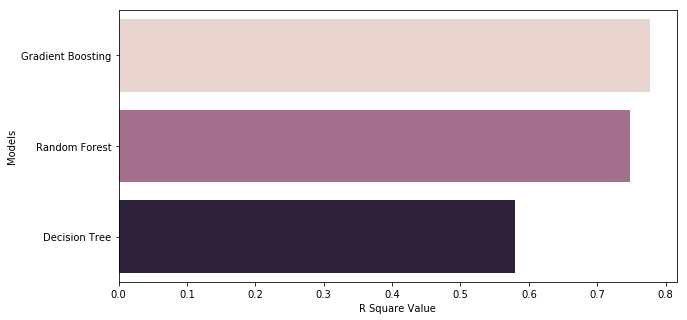

In [23]:
model_name = ['Gradient Boosting','Random Forest','Decision Tree']
plt.figure(figsize=(10,5))
sns.barplot(x=data_score,y=model_name,palette = sns.cubehelix_palette(len(data_score)))
plt.xlabel("R Square Value")
plt.ylabel("Models")
plt.show()

In [24]:
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Model' : m_key, 'Price': y_gb})
output.to_csv('submission.csv', index=False)